In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [4]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

In [5]:
df = pd.read_excel('FALL 2020 - 2024 FTIAC Daily Report 20240215.xlsx')

In [6]:
df.shape

(83990, 124)

In [7]:
print(df.columns)

Index(['Alternate ID', 'PIDM', 'Slate ID', 'Start Term', 'App Status',
       'Decision Category', 'Decision Released', 'Decision Reason',
       'Decision Date', 'Banner_Reg_Current_Term',
       ...
       'Heart of Detroit Eligible_Timestamp', 'School 1 City',
       'Permanent City', 'Cohorts Multi-Value Field',
       'Attributes Multi-Value Field', 'Build Scholars', 'Latino Studies',
       'Athletics Summer Bridge', 'Orientation_Attended_Date',
       'Application Population (comma)'],
      dtype='object', length=124)


# (A.) Exploratory Data Analysis 

# Decision Category vs Start Term

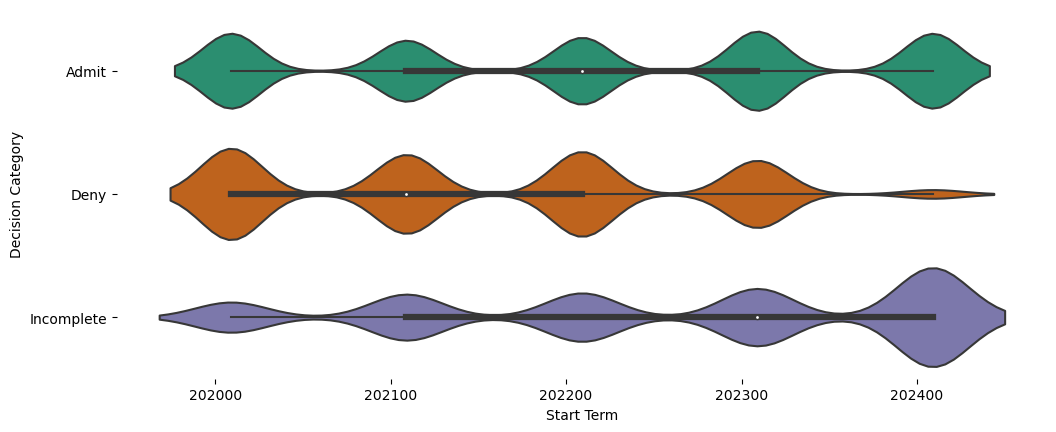

In [9]:
# Set the figure size based on the number of unique 'Decision Category' values
figsize = (12, 1.2 * len(df['Decision Category'].unique()))
# Create the figure with the specified size
plt.figure(figsize=figsize)
# Create a violin plot with 'Start Term' on the x-axis and 'Decision Category' on the y-axis
sns.violinplot(data=df, x='Start Term', y='Decision Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Display the plot
plt.show()


# Top 10 Major 

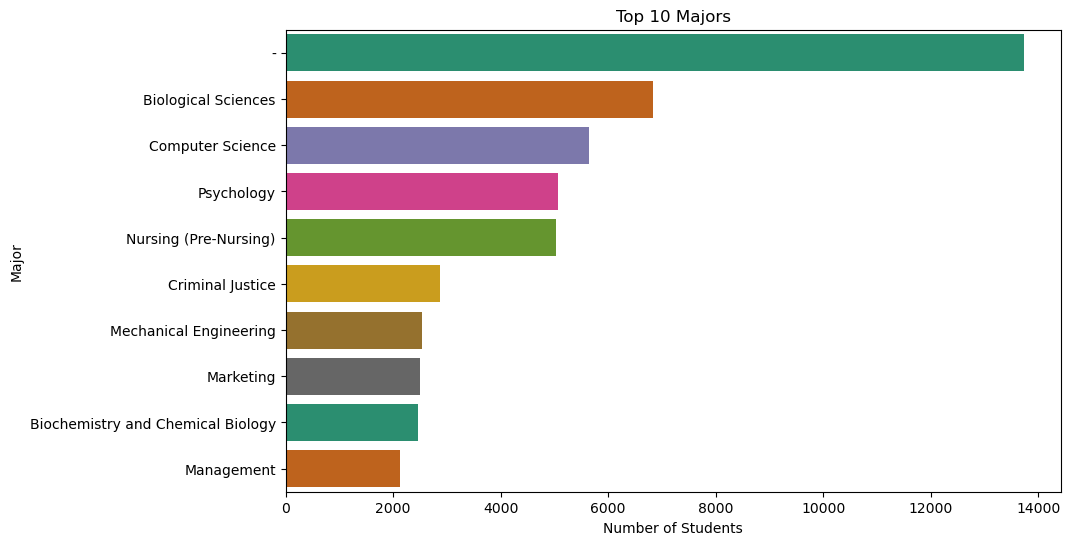

In [10]:
# Count the occurrences of each major
major_counts = df['Major'].value_counts().head(10)

# Plot the top 10 majors
plt.figure(figsize=(10, 6))
sns.barplot(x=major_counts.values, y=major_counts.index, palette='Dark2')
plt.title('Top 10 Majors')
plt.xlabel('Number of Students')
plt.ylabel('Major')
plt.show()

# Merit Awards for Top 10 Majors

Warrior Award                9154
Gold Award                   6599
Green Award                  4305
Scholar Award                3162
No Award                     1786
Detroit Leadership Award      270
Anthony Wayne Scholarship     234
President's Award              38
Name: Merit Award, dtype: int64


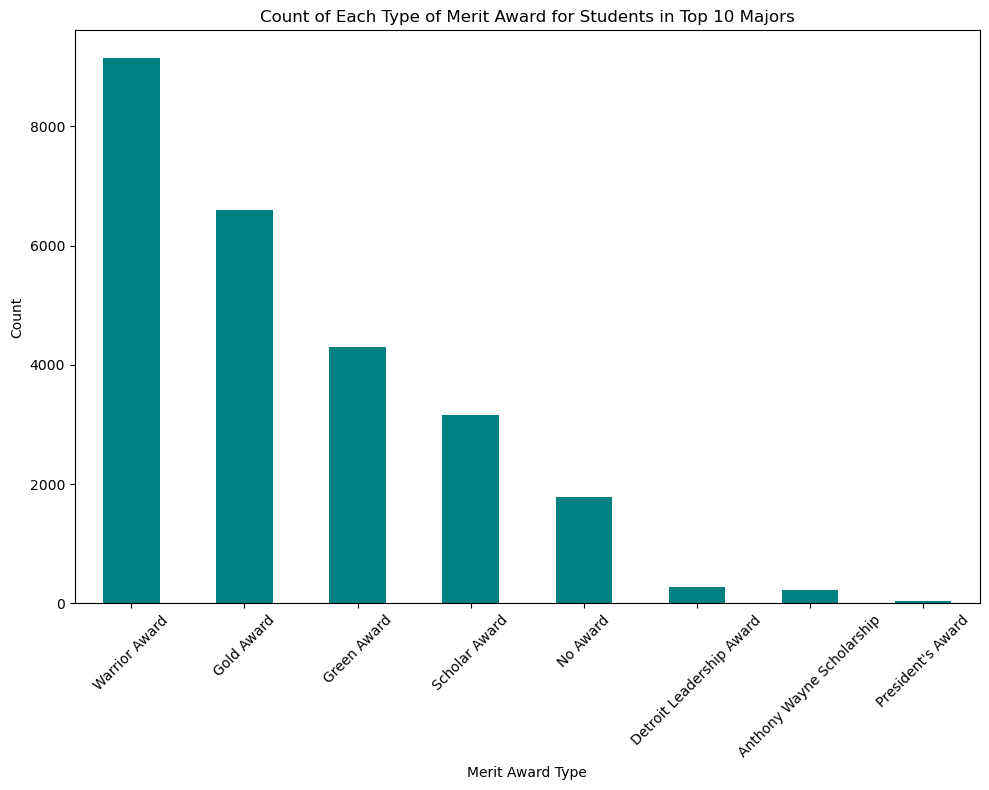

In [11]:
# Identify the top 10 majors
top_majors = df['Banner_Major_Desc_Term'].value_counts().head(10).index

# Filter dataset for students in the top 10 majors
students_in_top_majors = df[df['Banner_Major_Desc_Term'].isin(top_majors)]

# Count how many of each type of merit award students in the top 10 majors receive
merit_award_counts = students_in_top_majors['Merit Award'].value_counts()

# Display the counts
print(merit_award_counts)

# Creating a graphic to visualize these counts
plt.figure(figsize=(10, 8))
merit_award_counts.plot(kind='bar', color='teal')
plt.title('Count of Each Type of Merit Award for Students in Top 10 Majors')
plt.xlabel('Merit Award Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


# Top 10 Majors for First Generation Students

Biological Sciences           1708
Psychology                    1552
Computer Science              1390
Pre-Nursing                   1293
Exploratory Pre-Nursing        988
Criminal Justice               788
Biochem & Chemical Biology     678
Marketing                      620
Exp Physical Sciences/Math     570
Exploratory Life Sciences      566
Name: Banner_Major_Desc_Term, dtype: int64


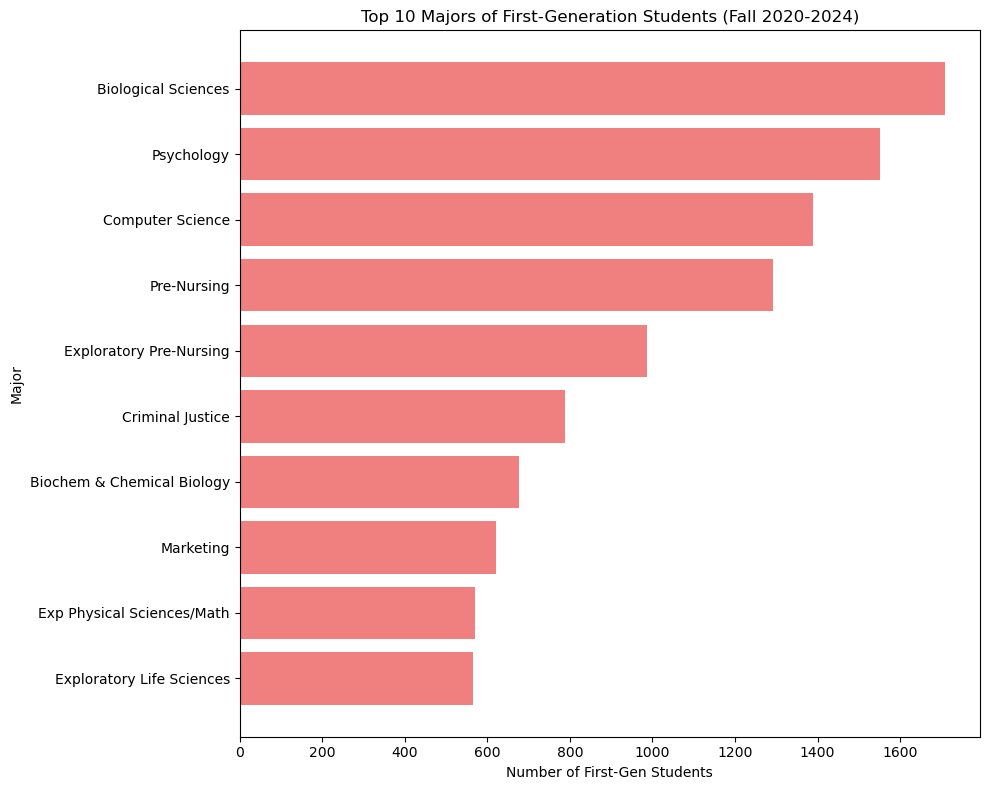

In [12]:
# Filter the dataset for first-generation students
First_Gen_data = df[df['First Gen'] == 'Y']

# Get the counts of each major for first-generation students
major_counts_First_Gen = First_Gen_data['Banner_Major_Desc_Term'].value_counts()

# Extract the top 10 most popular majors among first-generation students
top_10_majors_First_Gen = major_counts_First_Gen.head(10)

# Display the top 10 majors
print(top_10_majors_First_Gen)

# Top 10 majors for first-generation students and their counts
majors_first_gen = top_10_majors_First_Gen.index.tolist()
student_counts_first_gen = top_10_majors_First_Gen.values.tolist()

# Creating a bar chart for the top 10 majors of first-generation students
plt.figure(figsize=(10, 8))
plt.barh(majors_first_gen[::-1], student_counts_first_gen[::-1], color='lightcoral')
plt.xlabel('Number of First-Gen Students')
plt.ylabel('Major')
plt.title('Top 10 Majors of First-Generation Students (Fall 2020-2024)')
plt.tight_layout()

# Show plot
plt.show()


# Box Plot for "Merit Amount"

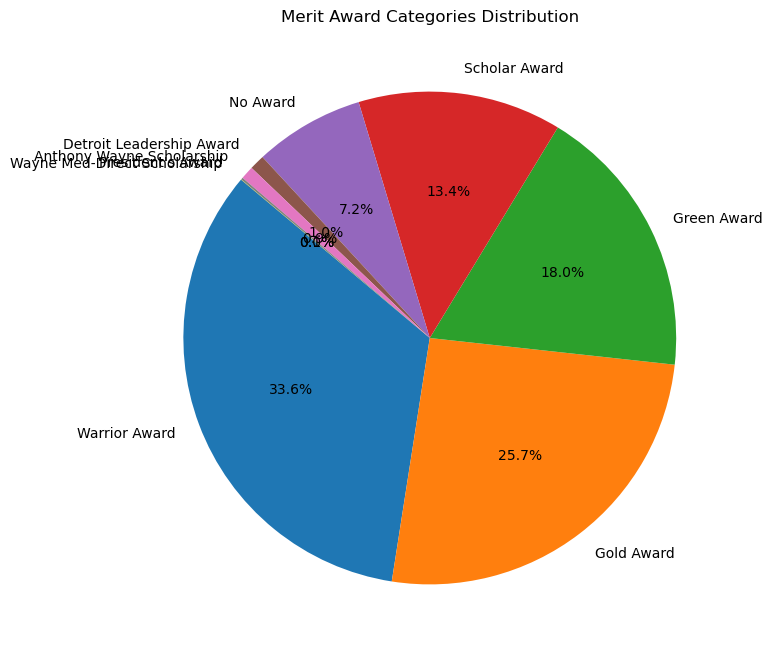

In [17]:
# Count the values in the "Merit Award" column
award_counts = df['Merit Award'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(award_counts, labels=award_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Merit Award Categories Distribution')
plt.show()


# (B.) Data Cleaning and Data Processing

In [ ]:
# Filter dataset of all admitted students

In [18]:
df1 = df[df['Decision Category'] == 'Admit'].dropna(subset=['Decision Category'])
df1.shape

(56150, 124)

In [19]:
print(df1.dtypes)

Alternate ID                       object
PIDM                              float64
Slate ID                            int64
Start Term                          int64
App Status                         object
                                   ...   
Build Scholars                     object
Latino Studies                     object
Athletics Summer Bridge            object
Orientation_Attended_Date          object
Application Population (comma)     object
Length: 124, dtype: object


In [20]:
df1.isnull().sum()

Alternate ID                          0
PIDM                                  4
Slate ID                              0
Start Term                            0
App Status                            0
                                  ...  
Build Scholars                    56128
Latino Studies                    56075
Athletics Summer Bridge           56141
Orientation_Attended_Date         56148
Application Population (comma)    14065
Length: 124, dtype: int64

# We deleted columns  with significant number of null values which cannot be handled by any of the imputation techniques from the list of  features. 

In [21]:
# List of columns to remove
columns_to_remove = [
    'Alternate ID', 'PIDM', 'Slate ID', 'App Status', 'Decision Category', 'Decision Released', 'Decision Reason',
    'Decision Date', 'Permanent Resident', 'Residency Status', 'Birth Country', 'Visa Needed', 'Tuition Rate',
    'Prime Tuition Rate', 'Med Direct', 'Macomb Advantage', 'Pre-Prof Advising', 'App Source', 'Submitted',
    'Banner Student Type', 'Accepted Admission', 'Merit Award', 'App Fee Balance', 'App Fee Received',
    'App Fee Waived', 'School - Level of Study', 'School - Code', 'School - Institution', 'School - City',
    'School - Region', 'GPA', 'School 1 GPA', 'School #1 Verified GPA', 'School #2 Verified GPA',
    'School #3 Verified GPA', 'School #4 Verified GPA', 'School #5 Verified GPA', 'School - Degree Conferred',
    'Overall Superscore', 'Highest ACT/SAT Score', 'ACT Composite', 'ACT English', 'ACT Math', 'ACT Reading',
    'ACT Science Reasoning', 'SAT R (taken March 2016 or later) Total',
    'SAT R (taken March 2016 or later) Evidence-Based Reading and Writing Section',
    'SAT R (taken March 2016 or later) Math Section', 'SAT R (taken March 2016 or later) Reading Test',
    'SAT R (taken March 2016 or later) Writing and Language Test', 'SAT R (taken March 2016 or later) Math Test',
    'Dual Enrollment', 'Exploratory Track', 'Concentration', 'Banner_Major_Code_Term', 'Banner_Major_Desc_Term',
    'City', 'Zip', 'County', 'NSO Event', 'NSO Event_Timestamp', 'NSO Session Name', 'NSO Event Time',
    'NSO Session Date', 'NSO RSVP Date', 'Banner Enrollment Deposit Deferred_Verified',
    'Banner Enrollment Deposit Paid', 'Detroit Leadership Interest',
    'Material Name_Detroit_Leadership_Award_Essay', 'Material Name_Detroit_Leadership_Award_Recommendation',
    'Highest Self Reported ACT/SAT Score', 'School #1 Unoffical GPA', 'School #1 Unofficial GPA Scale',
    'School #1 Unoff Transcript Received Date', 'School #2 Unoffical GPA', 'School #2 Unofficial GPA Scale',
    'School #2 Unoff Transcript Received Date', 'School #3 Unoffical GPA', 'School #3 Unofficial GPA Scale',
    'School #3 Unoff Transcript Received Date', 'School #4 Unoffical GPA', 'School #4 Unofficial GPA Scale',
    'School #4 Unoff Transcript Received Date', 'School #5 Unoffical GPA', 'School #5 Unofficial GPA Scale',
    'School #5 Unoff Transcript Received Date', '# Materials Received Past 7 Days', 'ACT or SAT Test Taken',
    'Official Transcript Status', 'Financial Document Status', 
    'Application Requirement Comments', 'Heart of Detroit Eligible_Timestamp', 'School 1 City', 'Permanent City',
    'Attributes Multi-Value Field', 'Orientation_Attended_Date', 'Application Population (comma)'
]

# Drop the specified columns
df1.drop(columns=columns_to_remove, inplace=True)


We carefuuly handled other  columns.

Missing data were carefully handled based on discussion with the experts

Continuous variables normalized to a mean of zero and standard deviation of one (Standard Scalar) in a later section

Categorical variables encoded via one-hot encoding.

In [22]:
# Rename the column
df1.rename(columns={'Start Term': 'Start_Term'}, inplace=True)

# Print unique values in the "Start_Term" column
print(df1['Start_Term'].unique())


[202009 202109 202209 202309 202409]


In [23]:
df1.columns

Index(['Start_Term', 'Banner_Reg_Current_Term', 'Sex', 'Age Today', 'Race',
       'Hispanic', 'Citizenship', 'First Gen', 'Merit Amount',
       'Merit Terms Accepted', 'School - City Type', 'School - Region Type',
       'Major', 'State', 'Verified Test Score Received',
       'Test Optional Population', 'Test Optional Admit',
       'Test Optional Document Status',
       'Test Optional Essay Submitted_Fulfilled',
       'Test Optional Activities Form Submitted_Fulfilled',
       'Test Optional Academic Reference Submitted_Fulfilled',
       'Michigan Assured Admission Pact Eligible', 'Heart of Detroit Eligible',
       'Cohorts Multi-Value Field', 'Build Scholars', 'Latino Studies',
       'Athletics Summer Bridge'],
      dtype='object')

In [24]:
# Define the mapping dictionary with strings enclosed in quotes
BanReg_mapping = {'N': 'No', 'Y': 'Yes'}

# Map the values in the 'Banner_Reg_Current_Term' column using the mapping dictionary
# If the value is not 'Y' or 'N', assign as 'Unknown'
df1['Banner_Reg_Current_Term'] = df1['Banner_Reg_Current_Term'].map(lambda x: BanReg_mapping.get(x, 'Unknown'))

# Display the unique values in the 'Banner_Reg_Current_Term' column
print(df1['Banner_Reg_Current_Term'].unique())


['No' 'Yes']


In [25]:
# Define the mapping dictionary with string values enclosed in quotes
sex_mapping = {'M': 'Male', 'F': 'Female'}

# Map the values in the 'Sex' column using the mapping dictionary
# If the value is not 'M' or 'F', assign as 'Others'
df1['Sex'] = df1['Sex'].map(lambda x: sex_mapping.get(x, 'Others'))

# Display the unique values in the 'Sex' column
print(df1['Sex'].unique())


['Female' 'Male' 'Others']


In [26]:
# Rename the column
df1.rename(columns={'Age Today': 'Age_Today'}, inplace=True)

# Convert values to integer
df1['Age_Today'] = df1['Age_Today'].astype(int)


In [27]:
# Define a function to map values in the 'Race' column to numeric values
def map_race_value(value):
    if value == 'White':
        return 'White'
    elif value == 'Black or African American':
        return 'Black or African American'
    elif value == 'Middle Eastern':
        return 'Middle Eastern'
    elif value == 'Asian':
        return 'Asian'
    elif value == '-':
        return 'Unknown'
    else:
        return 'MultiRacial'

# Apply the function to create the 'Race' column 
df1['Race'] = df1['Race'].apply(map_race_value)

# Print the unique values in the 'Race' column
print(df1['Race'].unique())


['White' 'Black or African American' 'Middle Eastern' 'Asian'
 'MultiRacial' 'Unknown']


In [28]:
# Define the mapping using a lambda function
hispanic_mapping = lambda x: 'Hispanic' if x.lower() == 'yes' else 'Non_Hispanic'

# Apply the mapping lambda function to the "Hispanic" column
df1['Hispanic'] = df1['Hispanic'].apply(hispanic_mapping)

# Print the unique values in the 'Hispanic' column
print(df1['Hispanic'].unique())


['Non_Hispanic' 'Hispanic']


In [29]:
# Define the mapping using a lambda function
citizenship_mapping = lambda x: 'United-States' if isinstance(x, str) and x.lower() == 'united states' else 'International'

# Apply the mapping lambda function to the "Citizenship" column
df1['Citizenship'] = df1['Citizenship'].apply(citizenship_mapping)

# Print the unique values in the 'Citizenship' column
print(df1['Citizenship'].unique())


['United-States' 'International']


In [30]:
# Rename the column
df1.rename(columns={'First Gen': 'First_Gen'}, inplace=True)

# Define the mapping using a lambda function
first_gen_mapping = lambda x: 'First_Generation_Student' if str(x).lower() == 'y' else 'N/A'

# Apply the mapping lambda function to the "First_Gen" column
df1['First_Gen'] = df1['First_Gen'].apply(first_gen_mapping)

# Print the unique values in the 'First_Gen' column
print(df1['First_Gen'].unique())


['N/A' 'First_Generation_Student']


In [31]:
# Rename the column
df1.rename(columns={'Merit Amount': 'Merit_Amount'}, inplace=True)

# Convert values to float and fill missing values with 0
df1['Merit_Amount'] = df1['Merit_Amount'].astype(float).fillna(0)

print(df1['Merit_Amount'].unique())


[ 6000.  4000.  2000.  9000.     0.   500.  5000. 12000.  2500.  4500.
  6500.  1000.]


In [32]:
# Rename the column
df1.rename(columns={'Merit Terms Accepted': 'Merit_Terms_Accepted'}, inplace=True)

# Define the mapping using a lambda function
merit_terms_mapping = lambda x: 'Merit_Terms_Accepted' if str(x).lower() == 'yes' else 'N/A'

# Apply the mapping lambda function to the "Merit_Terms_Accepted" column
df1['Merit_Terms_Accepted'] = df1['Merit_Terms_Accepted'].apply(merit_terms_mapping)

# Print the unique values in the 'Merit_Terms_Accepted' column
print(df1['Merit_Terms_Accepted'].unique())


['N/A' 'Merit_Terms_Accepted']


In [33]:
def map_city_type(value):
    if isinstance(value, str):
        # Remove whitespace and convert to lowercase for comparison
        value = value.strip().lower()
        if value == 'non-traditional':
            return 'non-traditional'
        elif value == 'rural':
            return 'rural'
        elif value == 'suburban':
            return 'suburban'
        elif value == 'urban':
            return 'urban'
    return 'N/A'  # Return 'N/A' for other cases, including NaN or non-string values

# Apply the mapping function to create the 'School_City_Type' column
df1['School_City_Type'] = df1['School - City Type'].apply(map_city_type)

# Drop the original column 'School - City Type' if needed
df1.drop(columns=['School - City Type'], inplace=True)

# Print the unique values in the updated column 'School_City_Type'
print(df1['School_City_Type'].unique())


['N/A' 'urban' 'rural']


In [ ]:
# Define the mapping dictionary with string values enclosed in quotes
schregion_mapping = {
    'Michigan': 'Michigan',
    'Other United States': 'Other United States',
    'Great Lakes Award': 'Great Lakes Award',
    'International': 'International'
}

# Map the values in the 'School_Region Type' column using the mapping dictionary
# If the value is not found in the mapping dictionary, assign as 'Others'
df1['School_Region_Type'] = df1['School - Region Type'].map(schregion_mapping).fillna('Others')

# Rename the column
df1.rename(columns={'School - Region Type': 'School_Region_Type'}, inplace=True)

# Display the unique values of the 'School_Region_Type' column in df1
print(df1['School_Region_Type'].unique())


In [ ]:
import pandas as pd

# Define the mapping dictionary for categories
major_categories_mapping = {
    'Biomedical Engineering (B.S.)': 'engineering',
    'Nursing (Pre-Nursing)': 'nursing',
    'Mechanical Engineering': 'engineering',
    'Political Science': 'sciences',
    'Computer Science': 'engineering',
    'Electrical Engineering': 'engineering',
    'Biochemistry and Chemical Biology': 'sciences',
    'Criminal Justice': 'sciences',
    'Biological Sciences': 'sciences',
    'Design and Merchandising (Fashion)': 'arts',
    'Psychology': 'sciences',
    '-': 'unknown',
    'Global Supply Chain Management': 'business',
    'Accounting': 'business',
    'Pre-Pharmacy': 'sciences',
    'Art': 'arts',
    'Mortuary Science (Pre-Major)': 'health sciences',
    'Chemistry': 'sciences',
    'Public Health - Bachelor of Science': 'sciences',
    'Neuroscience': 'sciences',
    'History': 'sciences',
    'Pre-Physical Therapy': 'sciences',
    'Marketing': 'business',
    'Management': 'business',
    'Theatre (Audition Required)': 'arts',
    'Sport Management - Bachelor of Science': 'business',
    'Media Arts and Studies': 'arts',
    'Chemical Engineering': 'engineering',
    'Biomedical Engineering (Pre-Major)': 'engineering',
    'Civil Engineering': 'engineering',
    'Journalism': 'arts',
    'Economics': 'sciences',
    'Finance': 'business',
    'Industrial Engineering': 'engineering',
    'Linguistics': 'sciences',
    'Biomedical Physics': 'sciences',
    'Engineering (General)': 'engineering',
    'Music (Audition Required)': 'arts',
    'English': 'sciences',
    'Construction Management': 'engineering',
    'Nutrition and Food Science': 'sciences',
    'Astronomy': 'sciences',
    'Physics': 'sciences',
    'Design': 'arts',
    'Exercise and Sport Science - Bachelor of Science': 'sciences',
    'Environmental Science': 'sciences',
    'Secondary Education (Pre-Major)': 'education',
    'APEX Scholars': 'unknown',
    'Social Work (Pre-Major)': 'social work',
    'Mathematics': 'sciences',
    'Elementary Education (Pre-Major)': 'education',
    'Film - Department of Communication': 'arts',
    'Clinical Lab Science (Pre-Major)': 'health sciences',
    'Health Education - (Community Health)': 'sciences',
    'Radiologic Technology (Pre-Major)': 'health sciences',
    'Anthropology': 'sciences',
    'Communication Sciences and Disorders': 'sciences',
    'Special Education (Pre-Major)': 'education',
    'Statistics - Bachelor of Science': 'sciences',
    'Dance (Audition Required)': 'arts',
    'Management Information Systems': 'business',
    'Urban Studies': 'sciences',
    'Communication Studies': 'arts',
    'Public Affairs': 'sciences',
    'Actuarial Mathematics - Bachelor of Arts': 'sciences',
    'Radiation Therapy Technology (Pre-Major)': 'health sciences',
    'Physical Education - Kinesiology (Pre-Major)': 'sciences',
    'Sociology': 'sciences',
    'Philosophy': 'sciences',
    'Public Relations - Department of Communication': 'arts',
    'African American Studies': 'sciences',
    'Mathematical Economics': 'sciences',
    'Global Studies': 'sciences',
    'Health Education (School Health)': 'sciences',
    'Asian Studies - Chinese, Japanese': 'sciences',
    'Geology': 'sciences',
    'Art History': 'arts',
    'Romance Languages - French, Italian, Spanish': 'sciences',
    'Near Eastern Languages - Arabic, Hebrew': 'sciences',
    'Learning Design and Technology - Bachelor of Science': 'sciences',
    'Slavic Studies - Polish, Russian': 'sciences',
    "Gender, Sexuality, and Women's Studies": 'sciences',
    'Near Eastern Studies': 'sciences',
    'German': 'sciences',
    'Information Technology - Bachelor of Science': 'engineering',
    'Health & Physical Education Teaching - Bachelor of Science': 'education',
    'Employment and Labor Relations': 'sciences',
    'Occupational Therapy (Pre-Major)': 'health sciences',
    'Community Health - Bachelor of Science': 'sciences',
    "Pre-Pathologists' Assistant": 'sciences',
    'Classics': 'sciences',
    'Electrical and Computer Engineering': 'engineering',
    'Early and Elementary Education': 'education',
    'Special Education': 'education',
    'Medical Lab Science (Pre Major)': 'health sciences',
    'Applied Health Sciences - Bachelor of Science': 'health sciences',
    'Law - Bachelor of Arts': 'sciences',
    'General Engineering - Bachelor of Science': 'engineering',
    'World Languages, Literatures, and Cultures': 'sciences',
    'Technology Information Systems and Analytics - B.S. in Business Administration': 'business',
    'Mechanical Engineering Technology': 'engineering',
    'Computer Technology': 'engineering'
}

# Define a mapping dictionary to convert categories to numerical values
major_mapping = {
    'engineering': 1,
    'nursing': 2,
    'sciences': 3,
    'arts': 4,
    'business': 5,
    'health sciences': 6,
    'education': 7,
    'social work': 8,
    'unknown': 0
}

# Apply the mapping to convert 'Major' column to category names
df1['Major'] = df1['Major'].map(major_categories_mapping).fillna('Unknown')

# Apply the second mapping to convert category names to integers
df1['Major'] = df1['Major'].map(major_mapping).fillna(0).astype(int)

# Display the unique values of the 'Major' column in df1
print(df1['Major'].unique())


In [163]:
import pandas as pd

# Define mapping for Resident State categories
state_categories_mapping = {
    'MN': 'Great_Lake_States',
    'WI': 'Great_Lake_States',
    'IL': 'Great_Lake_States',
    'IN': 'Great_Lake_States',
    'OH': 'Great_Lake_States',
    'PA': 'Great_Lake_States',
    'NY': 'Great_Lake_States',
    'MI': 'Michigan_State',
    'AL': 'Other_United_States',
    'AK': 'Other_United_States',
    'AZ': 'Other_United_States',
    'AR': 'Other_United_States',
    'CA': 'Other_United_States',
    'CO': 'Other_United_States',
    'CT': 'Other_United_States',
    'DE': 'Other_United_States',
    'FL': 'Other_United_States',
    'GA': 'Other_United_States',
    'HI': 'Other_United_States',
    'ID': 'Other_United_States',
    'IA': 'Other_United_States',
    'KS': 'Other_United_States',
    'KY': 'Other_United_States',
    'LA': 'Other_United_States',
    'ME': 'Other_United_States',
    'MD': 'Other_United_States',
    'MA': 'Other_United_States',
    'MS': 'Other_United_States',
    'MO': 'Other_United_States',
    'MT': 'Other_United_States',
    'NE': 'Other_United_States',
    'NV': 'Other_United_States',
    'NH': 'Other_United_States',
    'NJ': 'Other_United_States',
    'NM': 'Other_United_States',
    'NC': 'Other_United_States',
    'ND': 'Other_United_States',
    'OK': 'Other_United_States',
    'OR': 'Other_United_States',
    'RI': 'Other_United_States',
    'SC': 'Other_United_States',
    'SD': 'Other_United_States',
    'TN': 'Other_United_States',
    'TX': 'Other_United_States',
    'UT': 'Other_United_States',
    'VT': 'Other_United_States',
    'VA': 'Other_United_States',
    'WA': 'Other_United_States',
    'WV': 'Other_United_States',
    'WY': 'Other_United_States'
}

# Define a function to map values in the 'State' column to their categories
def map_state_value(value):
    if value in state_categories_mapping:
        return state_categories_mapping[value]
    else:
        return 'Unknown'

# Apply the function to create the new column 'State1'
df1['State'] = df1['State'].apply(map_state_value)

# Print the first 5 rows of the updated 'State1' column
#print(df1['State'].head())
print(df1['State'].unique())

['Michigan_State' 'Other_United_States' 'Great_Lake_States' 'Unknown']


In [164]:
# Define the mapping dictionary
state_mapping = {'Unknown': 0, 'Michigan_State': 1, 'Other_United_States': 2, 'Great_Lake_States': 3}

# Map the values in the 'State1' column using the mapping dictionary
df1['State'] = df1['State'].map(state_mapping)

print(df1['State'].unique())


[1 2 3 0]


In [165]:
# Convert values to binary (1 for 'Verified Test Score Received', 0 otherwise)
df1['Verified Test Score Received'] = df1['Verified Test Score Received'].apply(lambda x: 1 if x == 'Verified Test Score Received' else 0)

# Rename the column
df1.rename(columns={'Verified Test Score Received': 'Verified_Test_Score_Received'}, inplace=True)

# Print unique values in the updated column
print(df1['Verified_Test_Score_Received'].unique())


[1 0]


In [166]:
# Convert values 
df1['Test Optional Population'] = df1['Test Optional Population'].apply(lambda x: 1 if x == 'Test Optional Application' else 0)

# Rename the column
df1.rename(columns={'Test Optional Population': 'Test_Optional_Population'}, inplace=True)

# Print unique values in the updated column
print(df1['Test_Optional_Population'].unique())


[0 1]


In [167]:
# Convert values 
df1['Test Optional Admit'] = df1['Test Optional Admit'].apply(lambda x: 1 if x == 'Yes' else 0)

# Rename the column
df1.rename(columns={'Test Optional Admit': 'Test_Optional_Admit'}, inplace=True)

# Print unique values in the updated column
print(df1['Test_Optional_Admit'].unique())


[0 1]


In [168]:
# Convert values 
df1['Test Optional Document Status'] = df1['Test Optional Document Status'].apply(lambda x: 1 if x == 'All Test Opt Docs Submitted' else 0)

# Rename the column
df1.rename(columns={'Test Optional Document Status': 'Test_Optional_Document_Status'}, inplace=True)

# Print unique values in the updated column
print(df1['Test_Optional_Document_Status'].unique())


[0 1]


In [169]:
# Convert values 
df1['Test Optional Essay Submitted_Fulfilled'] = df1['Test Optional Essay Submitted_Fulfilled'].apply(lambda x: 1 if x == 'Test Opt Essay Submitted' else 0)

# Rename the column
df1.rename(columns={'Test Optional Essay Submitted_Fulfilled': 'Test Optional_Essay_Submitted_Fulfilled'}, inplace=True)

# Print unique values in the updated column
print(df1['Test Optional_Essay_Submitted_Fulfilled'].unique())


[0 1]


In [170]:
# Convert values to binary (1 for 'Test Opt Activities Submitted', 0 otherwise)
df1['Test Optional Activities Form Submitted_Fulfilled'] = df1['Test Optional Activities Form Submitted_Fulfilled'].apply(lambda x: 1 if x == 'Test Opt Activities Submitted' else 0)

# Rename the column
df1.rename(columns={'Test Optional Activities Form Submitted_Fulfilled': 'Test_Optional_Activities_Form_Submitted_Fulfilled'}, inplace=True)

# Print unique values in the updated column
print(df1['Test_Optional_Activities_Form_Submitted_Fulfilled'].unique())


[0 1]


In [171]:
# Convert values to binary (1 for 'Test Opt Activities Submitted', 0 otherwise)
df1['Test Optional Academic Reference Submitted_Fulfilled'] = df1['Test Optional Academic Reference Submitted_Fulfilled'].apply(lambda x: 1 if x == 'Academic Reference Submitted' else 0)

# Rename the column
df1.rename(columns={'Test Optional Academic Reference Submitted_Fulfilled': 'Test_Optional_Academic_Reference_Submitted_Fulfilled'}, inplace=True)

# Print unique values in the updated column
print(df1['Test_Optional_Academic_Reference_Submitted_Fulfilled'].unique())


[0 1]


In [172]:
# Convert values to binary 
df1['Michigan Assured Admission Pact Eligible'] = df1['Michigan Assured Admission Pact Eligible'].apply(lambda x: 1 if x == 'MAAP Eligible' else 0)

# Rename the column
df1.rename(columns={'Michigan Assured Admission Pact Eligible': 'Michigan_Assured_Admission_Pact_Eligible'}, inplace=True)

# Print unique values in the updated column
print(df1['Michigan_Assured_Admission_Pact_Eligible'].unique())


[0 1]


In [173]:
# Convert values to binary
df1['Heart of Detroit Eligible'] = df1['Heart of Detroit Eligible'].apply(lambda x: 1 if x == 'Yes' else 0)

# Rename the column
df1.rename(columns={'Heart of Detroit Eligible': 'Heart_of_Detroit_Eligible'}, inplace=True)

# Print unique values in the updated column
print(df1['Heart_of_Detroit_Eligible'].unique())


[0 1]


In [174]:
# Import necessary libraries
import pandas as pd


# Define a function to count unique words as integers
def count_unique_words(cell):
    if pd.isnull(cell):
        return 0
    else:
        words = cell.split(', ')
        return len(set(words))

# Apply the function to the 'Cohorts Multi-Value Field' column for all rows
df1['#_Cohorts_Multi_Value_Field'] = df1['Cohorts Multi-Value Field'].apply(count_unique_words)

# Drop the original column
df1.drop(columns=['Cohorts Multi-Value Field'], inplace=True)


# Print number of unique values in the new column
print("\nNumber of unique values in '#_Cohorts_Multi_Value_Field' column:", df1['#_Cohorts_Multi_Value_Field'].nunique())



Number of unique values in '#_Cohorts_Multi_Value_Field' column: 8


In [175]:
# Convert values to binary (1 for 'Yes', 0 for NaN or other values)
df1['Build Scholars'] = df1['Build Scholars'].apply(lambda x: 1 if x == 'Yes' else 0 if pd.notnull(x) else 0)

# Rename the column
df1.rename(columns={'Build Scholars': 'Build_Scholars'}, inplace=True)

# Print unique values in the updated column
print(df1['Build_Scholars'].unique())


[0 1]


In [176]:
# Convert values to binary
df1['Latino Studies'] = df1['Latino Studies'].apply(lambda x: 1 if x == 'Yes' else 0 if pd.notnull(x) else 0)

# Rename the column
df1.rename(columns={'Latino Studies': 'Latino_Studies'}, inplace=True)

# Print unique values in the updated column
print(df1['Latino_Studies'].unique())


[0 1]


In [177]:
# Convert values to binary
df1['Athletics Summer Bridge'] = df1['Athletics Summer Bridge'].apply(lambda x: 1 if x == 'Yes' else 0 if pd.notnull(x) else 0)

# Rename the column
df1.rename(columns={'Athletics Summer Bridge': 'Athletics_Summer_Bridge'}, inplace=True)

# Print unique values in the updated column
print(df1['Athletics_Summer_Bridge'].unique())


[0 1]


In [91]:
print(df1.columns)


Index(['Start_Term', 'Banner_Reg_Current_Term', 'Sex', 'Age_Today', 'Race',
       'Hispanic', 'Citizenship', 'First_Gen', 'Merit_Amount',
       'Merit_Terms_Accepted', 'School_Region_Type', 'Major', 'State',
       'Verified_Test_Score_Received', 'Test_Optional_Population',
       'Test_Optional_Admit', 'Test_Optional_Document_Status',
       'Test Optional_Essay_Submitted_Fulfilled',
       'Test_Optional_Activities_Form_Submitted_Fulfilled',
       'Test_Optional_Academic_Reference_Submitted_Fulfilled',
       'Michigan_Assured_Admission_Pact_Eligible', 'Heart_of_Detroit_Eligible',
       'Build_Scholars', 'Latino_Studies', 'Athletics_Summer_Bridge',
       'School_City_Type', '#_Cohorts_Multi_Value_Field'],
      dtype='object')


In [92]:
print(df1.shape)

(56150, 27)


# Define all columns in df

In [178]:
# Display unique values and number of unique values in each column
for column in df1.columns:
    unique_values = df1[column].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{column}': {num_unique_values} unique values")
    print(unique_values)
    print()


Column 'Start_Term': 5 unique values
[202009 202109 202209 202309 202409]

Column 'Banner_Reg_Current_Term': 2 unique values
[0 1]

Column 'Sex': 3 unique values
[1 0 2]

Column 'Age_Today': 34 unique values
[22 21 19 23 20 24 25 18 26 29 27 31 52 59 56 17 33 71 30  3 28 16 54 32
 39 48 35 47 15 11  0 51 37  8]

Column 'Race': 6 unique values
[1 2 3 4 5 0]

Column 'Hispanic': 2 unique values
[0 1]

Column 'Citizenship': 2 unique values
[1 0]

Column 'First_Gen': 2 unique values
[0 1]

Column 'Merit_Amount': 12 unique values
[ 6000.  4000.  2000.  9000.     0.   500.  5000. 12000.  2500.  4500.
  6500.  1000.]

Column 'Merit_Terms_Accepted': 2 unique values
[0 1]

Column 'School_Region_Type': 4 unique values
[1 2 3 4]

Column 'Major': 8 unique values
[1 2 0 3 4 5 6 7]

Column 'State': 4 unique values
[1 2 3 0]

Column 'Verified_Test_Score_Received': 2 unique values
[1 0]

Column 'Test_Optional_Population': 2 unique values
[0 1]

Column 'Test_Optional_Admit': 2 unique values
[0 1]

Colum

In [179]:
df1.columns

Index(['Start_Term', 'Banner_Reg_Current_Term', 'Sex', 'Age_Today', 'Race',
       'Hispanic', 'Citizenship', 'First_Gen', 'Merit_Amount',
       'Merit_Terms_Accepted', 'School_Region_Type', 'Major', 'State',
       'Verified_Test_Score_Received', 'Test_Optional_Population',
       'Test_Optional_Admit', 'Test_Optional_Document_Status',
       'Test Optional_Essay_Submitted_Fulfilled',
       'Test_Optional_Activities_Form_Submitted_Fulfilled',
       'Test_Optional_Academic_Reference_Submitted_Fulfilled',
       'Michigan_Assured_Admission_Pact_Eligible', 'Heart_of_Detroit_Eligible',
       'Build_Scholars', 'Latino_Studies', 'Athletics_Summer_Bridge',
       'School_City_Type', '#_Cohorts_Multi_Value_Field'],
      dtype='object')

In [22]:
df.columns

Index(['Start_Term', 'Banner_Reg_Current_Term', 'Sex', 'Merit_Award',
       'Merit_Amount', 'School_Region_Type', 'Overall_Superscore',
       'Verified_Test_Score_Received', 'Test_Optional_Population',
       'Test_Optional_Admit', 'Test_Optional_Essay_Submitted_Fulfilled',
       'Test_Optional_Activities_Form_Submitted_Fulfilled',
       'Test_Optional_Academic_Reference_Submitted_Fulfilled',
       'Michigan_Assured_Admission_Pact_Eligible', 'Build_Scholars',
       'Latino_Studies', 'Athletics_Summer_Bridge', 'Race', 'Citizenship',
       'Hispanic', 'Merit_Terms_Accepted', 'First_Gen', 'School_City_Type',
       'GPA_new', 'Major', 'State', 'Heart_of_Detroit_Eligible',
       '#_Cohorts_Multi-Value_Field'],
      dtype='object')

In [23]:
df.shape

(56150, 28)

In [24]:
df1=df

In [27]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df1 is your DataFrame with the specified columns

# Descriptive statistics for continuous variables
#numerical_stats = df1[['Age_Today', 'Merit_Amount']].describe()

# Descriptive statistics for categorical variables
categorical_stats = {}
for col in df1.columns:
    if col not in ['Banner_Reg_Current_Term', 'Age_Today', 'Merit_Amount']:
        categorical_stats[col] = df1[col].value_counts()

# Chi-square test for categorical variables vs. dependent variable
chi2_results = {}
for col in categorical_stats.keys():
    contingency_table = pd.crosstab(df1[col], df1['Banner_Reg_Current_Term'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p}

# Print descriptive statistics
#print("Numerical Variables Descriptive Stats:")
#print(numerical_stats)

print("\nCategorical Variables Value Counts:")
for col, val_counts in categorical_stats.items():
    print(f"\n{col}:")
    print(val_counts)

# Print chi-square test results
print("\nChi-square Test Results:")
for col, result in chi2_results.items():
    print(f"\n{col}:")
    print(f"Chi2: {result['Chi2']}")
    print(f"p-value: {result['p-value']}")



Categorical Variables Value Counts:

Start_Term:
202309    12463
202009    11793
202409    11776
202209    10513
202109     9605
Name: Start_Term, dtype: int64

Sex:
F              34164
M              21690
B                183
None Listed      113
Name: Sex, dtype: int64

Merit_Award:
Warrior Award                   18673
Gold Award                      14283
Green Award                     10008
Scholar Award                    7411
No Award                         3949
Detroit Leadership Award          553
Anthony Wayne Scholarship         475
President's Award                  73
Wayne Med-Direct Scholarship       11
Name: Merit_Award, dtype: int64

School_Region_Type:
Michigan               52167
Great Lakes Award       1947
Other United States     1501
International            535
Name: School_Region_Type, dtype: int64

Overall_Superscore:
21.0    3124
24.0    2970
19.0    2631
22.0    2566
23.0    2435
20.0    2329
25.0    2315
27.0    2268
26.0    1954
17.0    1908
18.0    18

In [182]:
#print(df.head())
df1.isnull().sum() 

Start_Term                                              0
Banner_Reg_Current_Term                                 0
Sex                                                     0
Age_Today                                               0
Race                                                    0
Hispanic                                                0
Citizenship                                             0
First_Gen                                               0
Merit_Amount                                            0
Merit_Terms_Accepted                                    0
School_Region_Type                                      0
Major                                                   0
State                                                   0
Verified_Test_Score_Received                            0
Test_Optional_Population                                0
Test_Optional_Admit                                     0
Test_Optional_Document_Status                           0
Test Optional_

# Extraction of the Encoded Data

In [183]:
df1.to_excel('encoded_data1.xlsx', index = False)

In [48]:
df = pd.read_excel('encoded_data.xlsx')
#print(df.head())

In [49]:
df1=df

In [50]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df1 is your DataFrame with the specified columns

# Descriptive statistics for continuous variables
#numerical_stats = df1[['Age_Today', 'Merit_Amount']].describe()

# Descriptive statistics for categorical variables
categorical_stats = {}
for col in df1.columns:
    if col not in ['Banner_Reg_Current_Term', 'Age_Today', 'Merit_Amount']:
        categorical_stats[col] = df1[col].value_counts()

# Chi-square test for categorical variables vs. dependent variable
chi2_results = {}
for col in categorical_stats.keys():
    contingency_table = pd.crosstab(df1[col], df1['Banner_Reg_Current_Term'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p}

# Print descriptive statistics
#print("Numerical Variables Descriptive Stats:")
#print(numerical_stats)

print("\nCategorical Variables Value Counts:")
for col, val_counts in categorical_stats.items():
    print(f"\n{col}:")
    print(val_counts)

# Print chi-square test results
print("\nChi-square Test Results:")
for col, result in chi2_results.items():
    print(f"\n{col}:")
    print(f"Chi2: {result['Chi2']}")
    print(f"p-value: {result['p-value']}")



Categorical Variables Value Counts:

Start_Term:
202309    12463
202009    11793
202409    11776
202209    10513
202109     9605
Name: Start_Term, dtype: int64

Sex:
1    34164
0    21690
2      296
Name: Sex, dtype: int64

Race:
1    26437
2     9750
0     8706
4     8514
3     2743
Name: Race, dtype: int64

Hispanic:
0    51546
1     4604
Name: Hispanic, dtype: int64

Citizenship:
1    53284
0     2866
Name: Citizenship, dtype: int64

First_Gen:
0    34786
1    21364
Name: First_Gen, dtype: int64

Merit_Terms_Accepted:
0    42369
1    13781
Name: Merit_Terms_Accepted, dtype: int64

School_City_Type:
0    50742
3     5317
2       91
Name: School_City_Type, dtype: int64

School_Region_Type:
1    52167
3     1947
2     1501
4      535
Name: School_Region_Type, dtype: int64

Major:
0    31369
1     9479
4     6303
3     3589
2     2651
6     1277
5      999
7      483
Name: Major, dtype: int64

State:
1    52279
3     1502
2     1377
0      992
Name: State, dtype: int64

Verified_Test_S

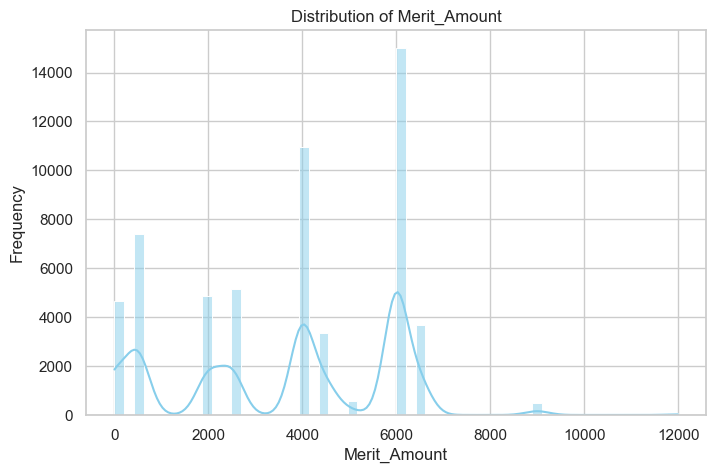

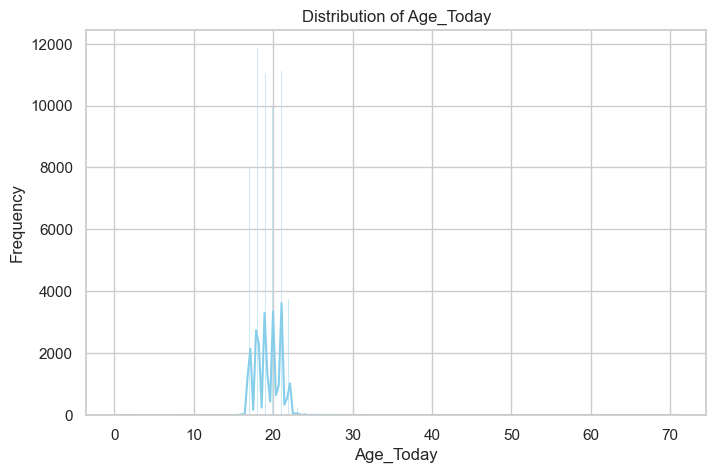

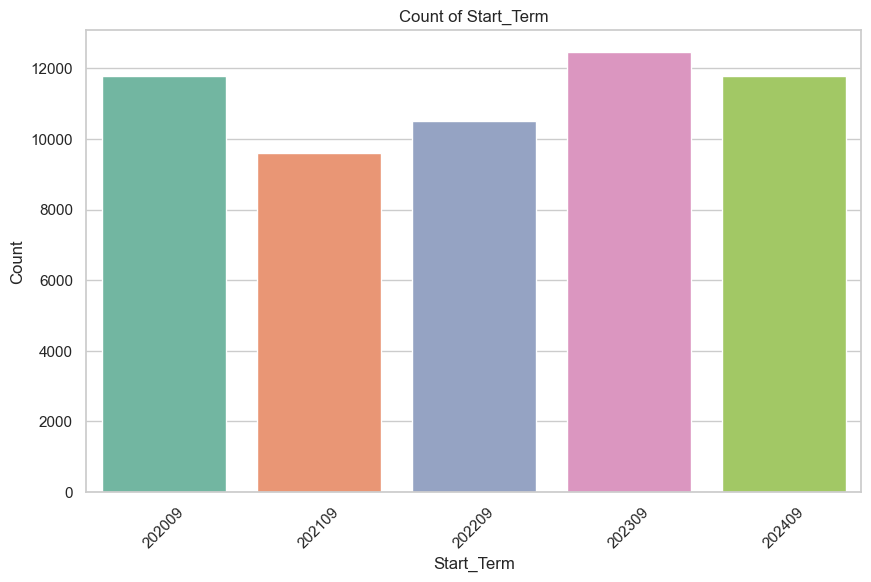

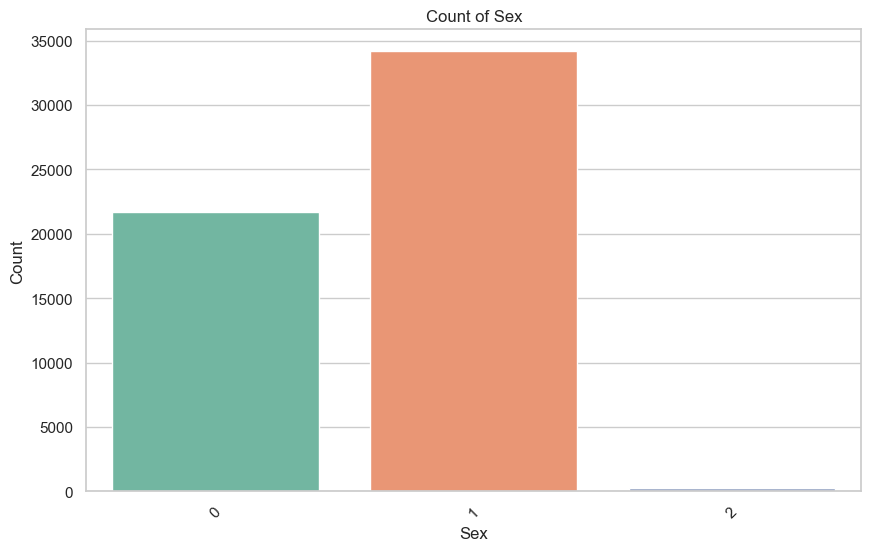

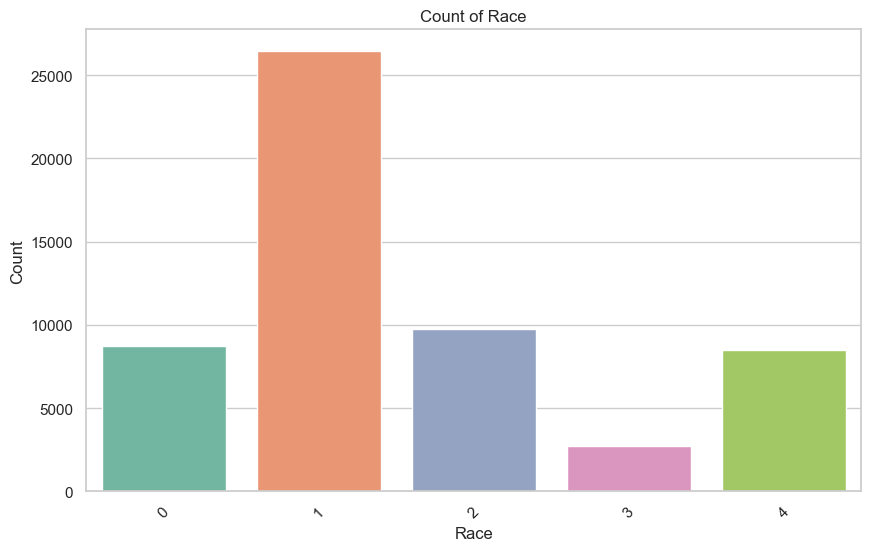

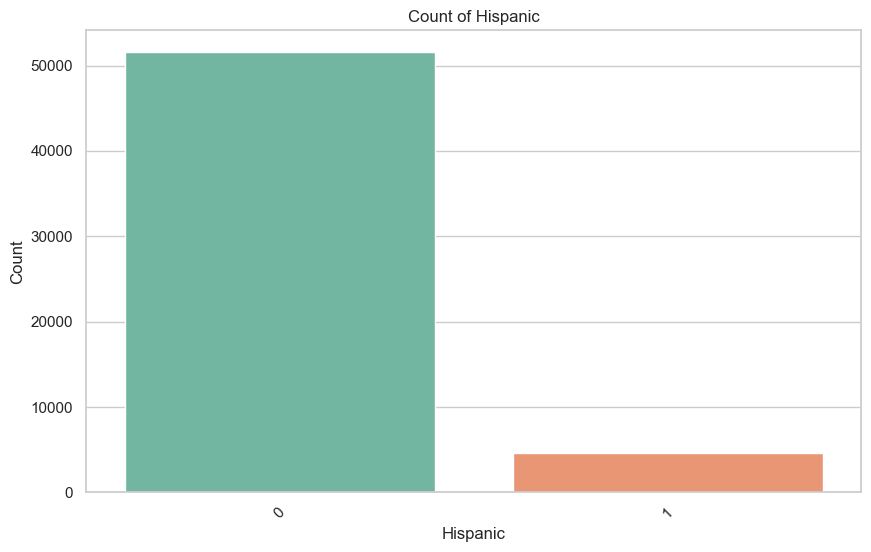

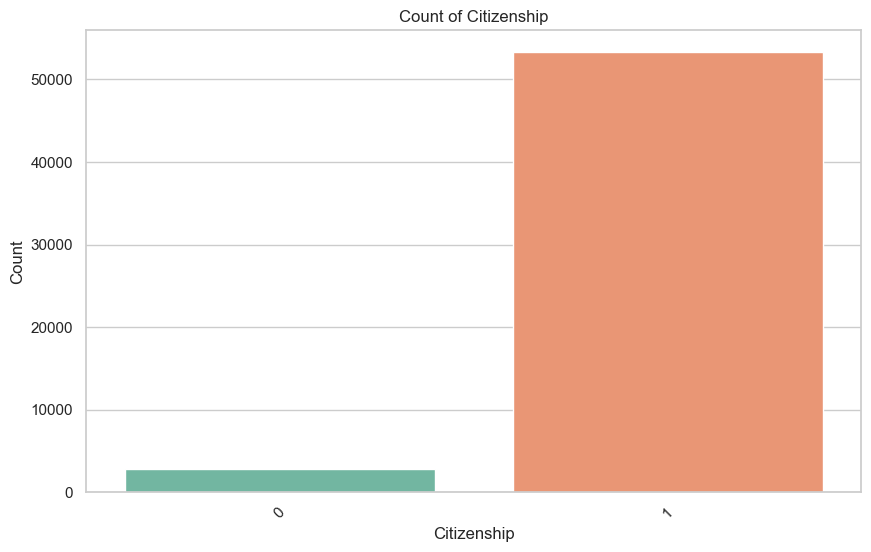

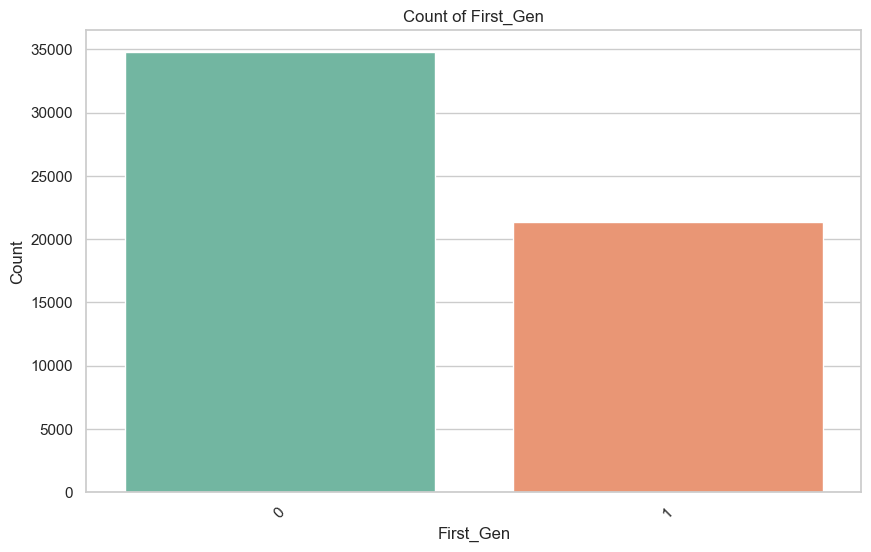

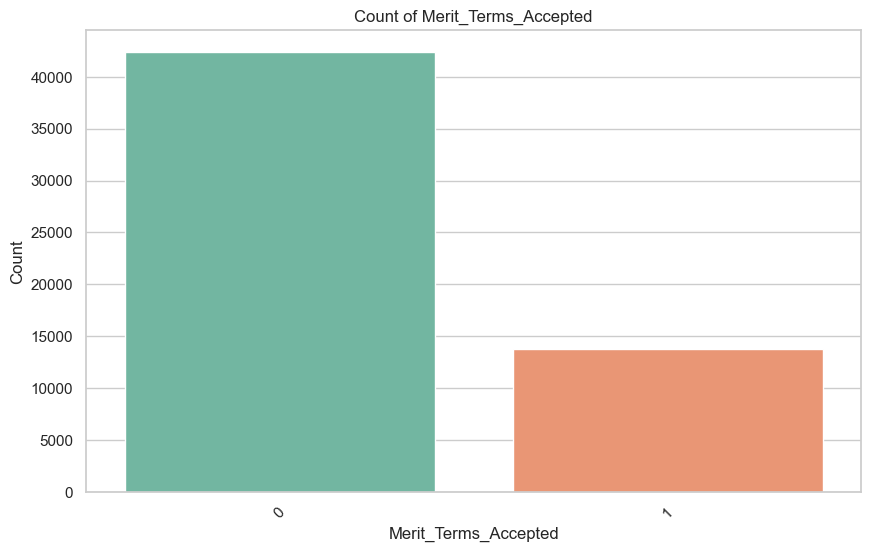

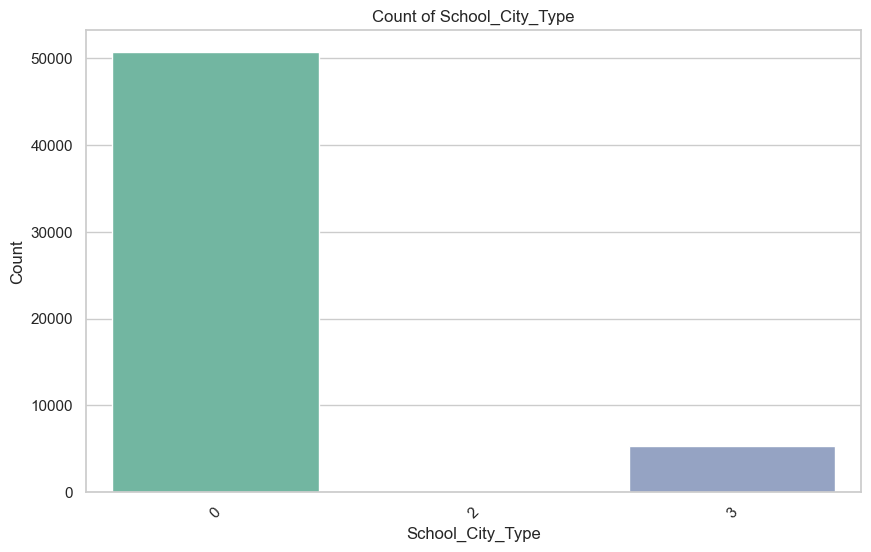

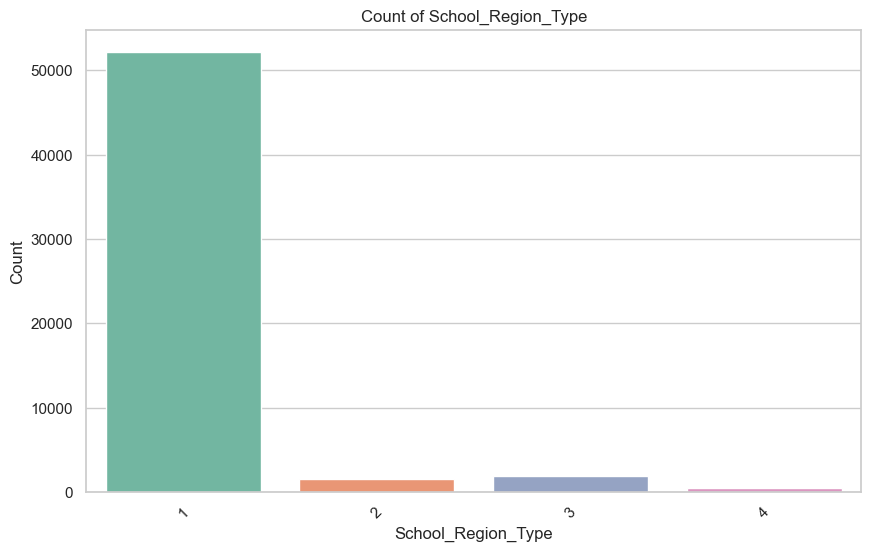

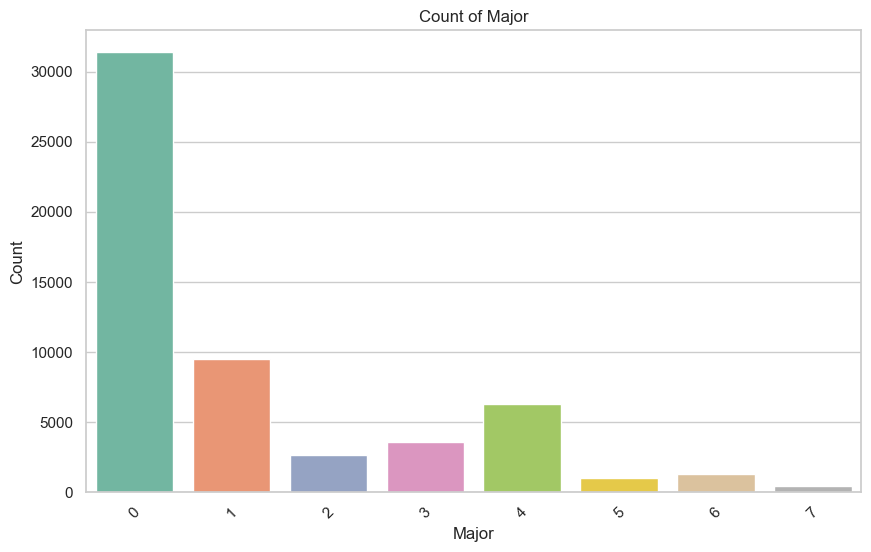

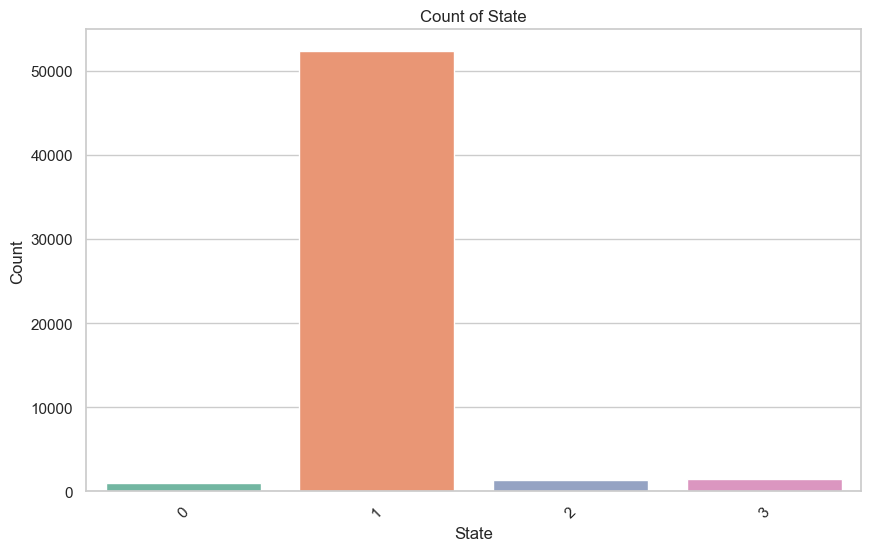

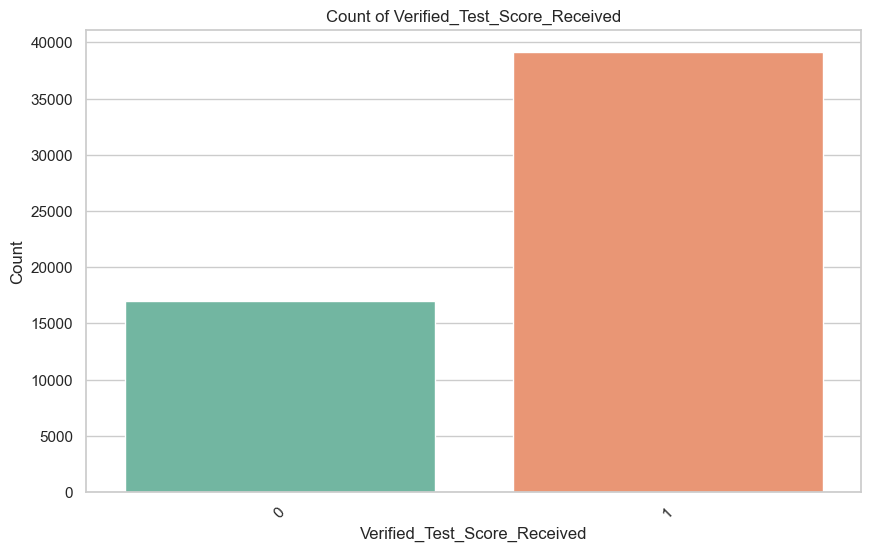

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Define the numerical and categorical columns
numerical_cols = ['Merit_Amount', 'Age_Today']  # Add more numerical columns if needed
categorical_cols = ['Start_Term', 'Sex', 'Race', 'Hispanic', 'Citizenship', 'First_Gen', 'Merit_Terms_Accepted', 'School_City_Type', 'School_Region_Type', 'Major', 'State', 'Verified_Test_Score_Received']  # Add more categorical columns if needed

# Plot histograms for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df1[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot count plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df1, palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [103]:
df.shape

(56150, 27)

•	Distribution of the Continuous Variables:  Merit Amount and Applicant’ Age 

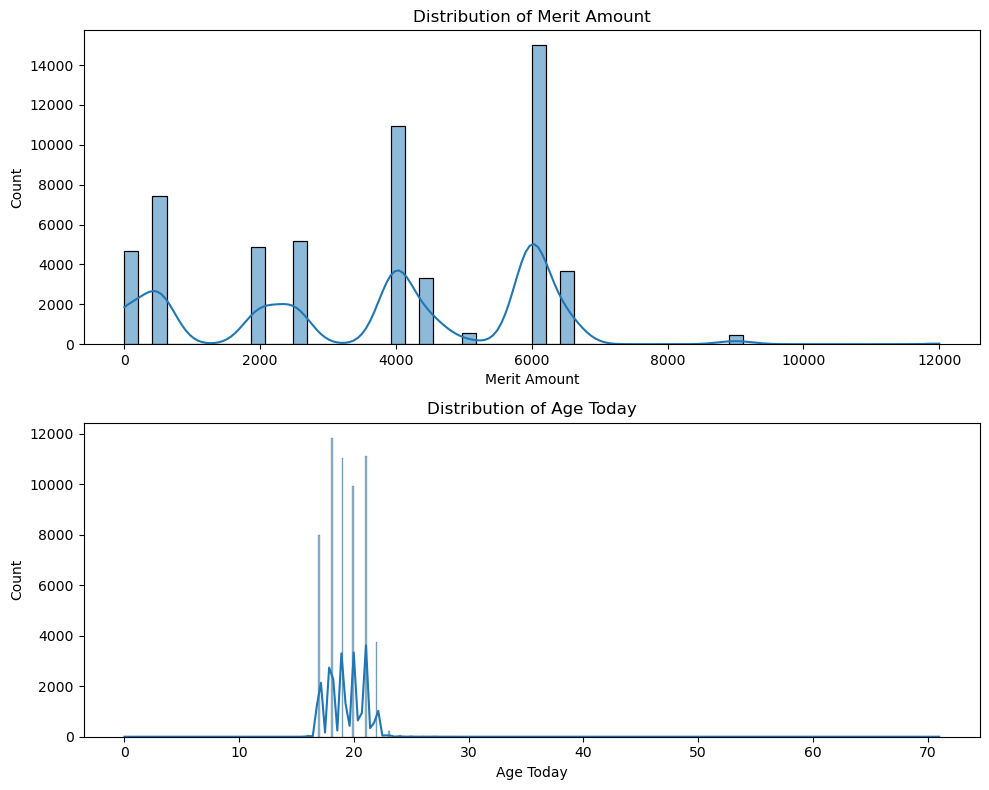

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the variables Merit_Amount and Age_Today

# Set up the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram density for Merit_Amount
sns.histplot(data=df, x='Merit_Amount', kde=True, ax=axs[0])
axs[0].set_title('Distribution of Merit Amount')
axs[0].set_xlabel('Merit Amount')

# Plot histogram density for Age_Today
sns.histplot(data=df, x='Age_Today', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Age Today')
axs[1].set_xlabel('Age Today')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [104]:
# Define X and y
X = df.drop(columns=['Banner_Reg_Current_Term'])  # Features (all columns except 'Banner_Reg_Current_Term')
y = df['Banner_Reg_Current_Term']  # Target variable
#print(X)
X.shape, y.shape


((56150, 26), (56150,))

# Feature selection 

In [105]:
# Logistic Regresion with L1 Regularisation 

For feature selection, we used the Logistic Regresion model with L1 Regularisation and to  obtain the best regularisation value, we used KFold=10 cross validation.

In [109]:
#Split data to training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 43)

## CROSS VALIDATION

# C is specified as Cs_values

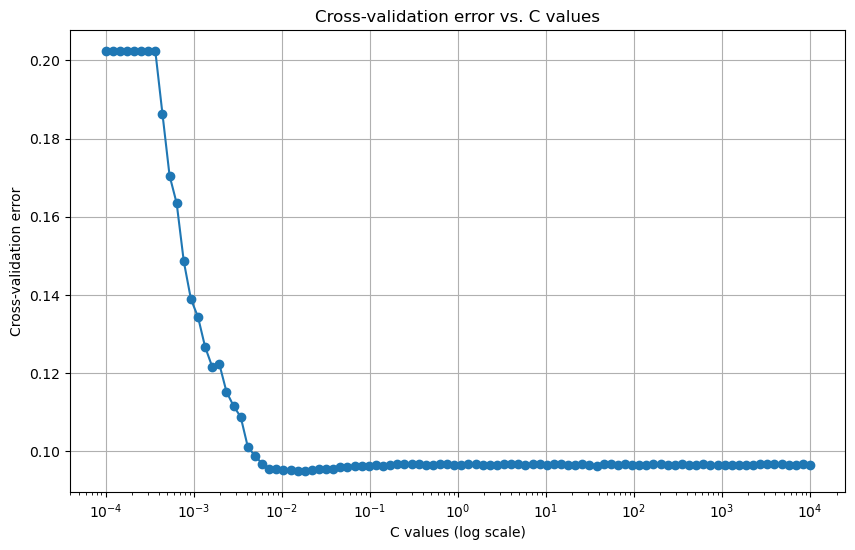

Best value of C: 0.018307382802953697


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

# Specify the candidate values of C
Cs_values = np.logspace(-4, 4, 100)  # Logarithmic scale between 1.0e-04 and 1.00000000e+04 using 100 values

# Store the cross-validation errors
cv_errors = []

# Compute cross-validation error for each value of C
for C in Cs_values:
    log_cv = LogisticRegressionCV(Cs=[C], cv=10, penalty='l1', solver='liblinear', max_iter=1000)
    cv_scores = cross_val_score(log_cv, X_train, y_train, cv=10, scoring='accuracy')
    cv_errors.append(1 - np.mean(cv_scores))  # Compute error (1 - accuracy)

# Select the C value with the smallest cross-validation error
best_C_index = np.argmin(cv_errors)
opt_C2 = Cs_values[best_C_index]

# Plot varying values of C with cross-validation error
plt.figure(figsize=(10, 6))
plt.plot(Cs_values, cv_errors, marker='o')
plt.title('Cross-validation error vs. C values')
plt.xlabel('C values (log scale)')
plt.ylabel('Cross-validation error')
plt.xscale('log')
plt.grid(True)
plt.show()

print("Best value of C:", opt_C2)


In [113]:
#Best value of C: 0.010476157527896652
#Best value of C: 0.015199110829529346

from sklearn.feature_selection import SelectFromModel

# Fit LogisticRegressionCV model with the optimal C value (opt_C1 or opt_C2)
log_cv = LogisticRegressionCV(Cs=[opt_C2], cv=10, penalty='l1', solver='liblinear', max_iter=1000)
log_cv.fit(X_train, y_train)

# Create SelectFromModel instance with fitted LogisticRegressionCV model as the estimator
sfm2 = SelectFromModel(log_cv, prefit=True)

# Transform the training and testing data based on feature selection
X_train_selected_1 = sfm2.transform(X_train)
X_test_selected_1 = sfm2.transform(X_test)



C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Identify the selected features 

In [114]:
# Analyze selected features and their importance
selected_feature_indices = np.where(sfm2.get_support())[0]
selected_features = df.columns[selected_feature_indices]  # Use columns to get the feature names
coefficients = log_cv.coef_

# Count the number of features selected
num_selected_features = len(selected_features)

print("Number of Selected Features:", num_selected_features)
print("Selected Features:", selected_features)
print("Feature Coefficients:", coefficients)


Number of Selected Features: 15
Selected Features: Index(['Start_Term', 'Sex', 'Age_Today', 'First_Gen', 'Merit_Amount',
       'Merit_Terms_Accepted', 'School_City_Type', 'School_Region_Type',
       'Major', 'State', 'Test_Optional_Population',
       'Test_Optional_Document_Status',
       'Test_Optional_Academic_Reference_Submitted_Fulfilled',
       'Michigan_Assured_Admission_Pact_Eligible', 'Athletics_Summer_Bridge'],
      dtype='object')
Feature Coefficients: [[-1.51732278e-05  0.00000000e+00  7.04831933e-02  3.40930925e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.79395406e-04
   4.08074138e+00  1.73354401e-01 -1.38480532e-01 -1.38158483e-02
  -1.33976959e-01  1.74675562e-01  0.00000000e+00  3.01587961e-02
   0.00000000e+00  1.10416665e-01  0.00000000e+00  0.00000000e+00
  -3.25559357e+00  2.54178254e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.84765625e-01]]


# Binomial  logistic regression method is  used to relate explanatory variables to student enrollment

In [115]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Fit the design matrix to the training data
X_train_design = sm.add_constant(X_train_selected_1)  # Adding constant for intercept
X_test_design = sm.add_constant(X_test_selected_1)    # Adding constant for intercept

# Fit the GLM
glm = sm.GLM(y_train, X_train_design, family=sm.families.Binomial())
results = glm.fit()

# Summarize the results
print(results.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     Banner_Reg_Current_Term   No. Observations:                33690
Model:                                 GLM   Df Residuals:                    33674
Model Family:                     Binomial   Df Model:                           15
Link Function:                       Logit   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -8022.9
Date:                     Sun, 21 Apr 2024   Deviance:                       16046.
Time:                             02:11:45   Pearson chi2:                 2.29e+04
No. Iterations:                         28   Pseudo R-squ. (CS):             0.4120
Covariance Type:                 nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [116]:
import numpy as np

# Get coefficients and standard errors
coefficients = results.params
std_errors = results.bse

# Compute odds ratios and 95% CIs
odds_ratios = np.exp(coefficients)
ci_lower = np.exp(coefficients - 1.96 * std_errors)
ci_upper = np.exp(coefficients + 1.96 * std_errors)

# Display results
for i, coef_name in enumerate(coefficients.index):
    print(f'{coef_name}:')
    print(f'Odds Ratio: {odds_ratios[i]:.4f}')
    print(f'95% CI: [{ci_lower[i]:.4f}, {ci_upper[i]:.4f}]')
    print()


const:
Odds Ratio: 4432747750229200935121443921726174992788669935843964098425888848540269772175974672105472.0000
95% CI: [1532662474670162161961432553415092731904.0000, 12820339077845823276039222189519090632861156954085614525958208018113912226839531247489871077930911166579126064344165623474446892269568000.0000]

x1:
Odds Ratio: 0.9990
95% CI: [0.9984, 0.9995]

x2:
Odds Ratio: 1.0073
95% CI: [0.9661, 1.0503]

x3:
Odds Ratio: 1.0464
95% CI: [1.0130, 1.0810]

x4:
Odds Ratio: 0.9997
95% CI: [0.9997, 0.9998]

x5:
Odds Ratio: 72.0539
95% CI: [65.4329, 79.3450]

x6:
Odds Ratio: 1.0848
95% CI: [1.0011, 1.1755]

x7:
Odds Ratio: 0.8387
95% CI: [0.7691, 0.9146]

x8:
Odds Ratio: 0.9754
95% CI: [0.9528, 0.9985]

x9:
Odds Ratio: 0.7661
95% CI: [0.6751, 0.8694]

x10:
Odds Ratio: 1.8493
95% CI: [1.6066, 2.1287]

x11:
Odds Ratio: 1.7763
95% CI: [1.0452, 3.0188]

x12:
Odds Ratio: 1.2739
95% CI: [0.7576, 2.1418]

x13:
Odds Ratio: 0.0000
95% CI: [0.0000, inf]

x14:
Odds Ratio: 2.4386
95% CI: [1.9266, 3.08

C:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Predictive  Modelling and Selection

# Model 1: Binomial Logistic Regression 

In [ ]:
#Model Building 
scaler = StandardScaler()
lr = LogisticRegression(penalty = None)
model1 = Pipeline([('standardize', scaler),
                    ('log_reg', lr)])


model1.fit(X_train_selected1, y_train) 

In [18]:
#Model training and training score
y_train_pred = model1.predict(X_train_selected1)
y_train_pred_probs = model1.predict_proba(X_train_selected1)[:,1]

train_accuracy = accuracy_score(y_train, y_train_pred)*100
train_auc_roc = roc_auc_score(y_train, y_train_pred_probs)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_pred))

print('Training AUC: %.4f %%' % train_auc_roc)

print('Training accuracy: %.4f %%' % train_accuracy)

Confusion matrix:
 [[20817  1570]
 [ 1099  4589]]
Training AUC: 94.7052 %
Training accuracy: 90.4933 %


In [19]:
#Model testing  and testing  score
y_test_pred = model1.predict(X_test_selected1)
y_test_pred_probs = model1.predict_proba(X_test_selected1)[:,1]

test_accuracy = accuracy_score(y_test, y_test_pred)*100
test_auc_roc = roc_auc_score(y_test, y_test_pred_probs)*100

print('Confusion matrix(test):\n', confusion_matrix(y_test, y_test_pred))

print('Testing AUC(test): %.4f %%' % test_auc_roc)

print('Testing accuracy: %.4f %%' % test_accuracy)

Confusion matrix(test):
 [[20853  1645]
 [ 1049  4528]]
Testing AUC(test): 94.4472 %
Testing accuracy: 90.4043 %


              precision    recall  f1-score   support

           0      0.952     0.927     0.939     22498
           1      0.734     0.812     0.771      5577

    accuracy                          0.904     28075
   macro avg      0.843     0.869     0.855     28075
weighted avg      0.909     0.904     0.906     28075



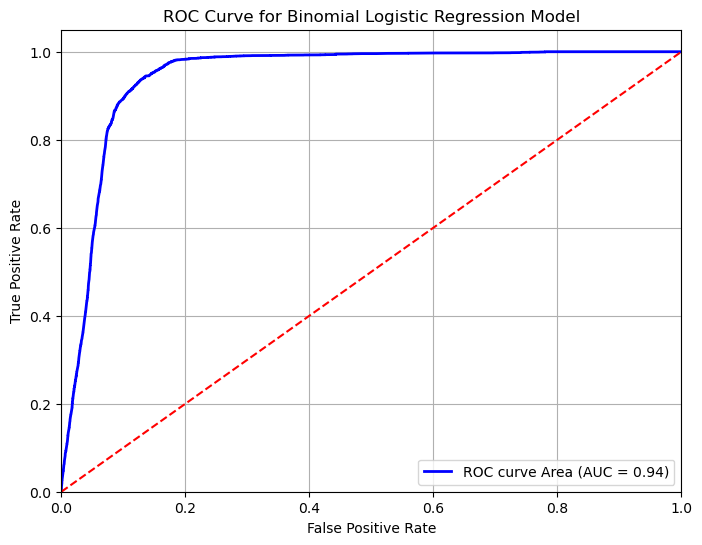

In [20]:
#To get more clarity. we use classification_report() function  and the roc curve 
#to get the  precision and recall of the model for the test dataset.
#If we look at the f1-score for row 1, we come to know that our model is able to identify about 72%  of the 
#enrollment  cases

print(classification_report(y_test, y_test_pred, digits=3))

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
roc_auc = roc_auc_score(y_test, y_test_pred_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve Area (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binomial Logistic Regression Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Model 2: Linear Discriminant Analysis

Confusion matrix:
 [[20205  2182]
 [  948  4740]]
Training AUC: 94.1590 %
Training accuracy: 88.8513 %
Confusion matrix(test):
 [[20286  2212]
 [  932  4645]]
Testing AUC(test): 93.9119 %
Testing accuracy: 88.8014 %
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     22498
           1       0.68      0.83      0.75      5577

    accuracy                           0.89     28075
   macro avg       0.82      0.87      0.84     28075
weighted avg       0.90      0.89      0.89     28075

Prediction Accuracy: 0.888


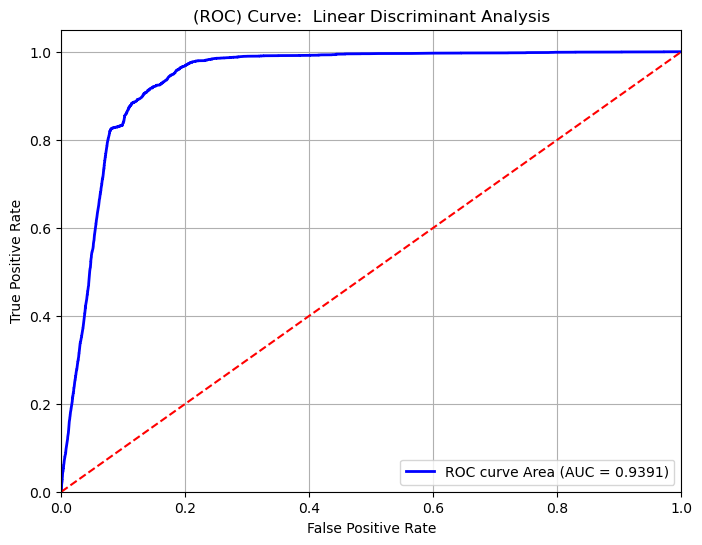

Execution time: 0.622 seconds


In [99]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



start_time = time.time()  # Record the start time

# Train a LinearDiscriminantAnalysis Classifier using the selected features
model6 = LinearDiscriminantAnalysis()
model6.fit(X_train_selected1, y_train) 

#Model training and training score
y_train_pred6 = model6.predict(X_train_selected1)
y_train_pred_probs6 = model6.predict_proba(X_train_selected1)[:,1]

train_accuracy6 = accuracy_score(y_train, y_train_pred6)*100
train_auc_roc6 = roc_auc_score(y_train, y_train_pred_probs6)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_pred6))

print('Training AUC: %.4f %%' % train_auc_roc6)

print('Training accuracy: %.4f %%' % train_accuracy6)


#Model testing  and testing  score
y_test_pred6 = model6.predict(X_test_selected1)
y_test_pred_probs6 = model6.predict_proba(X_test_selected1)[:,1]

test_accuracy6 = accuracy_score(y_test, y_test_pred6)*100
test_auc_roc6 = roc_auc_score(y_test, y_test_pred_probs6)*100

print('Confusion matrix(test):\n', confusion_matrix(y_test, y_test_pred6))

print('Testing AUC(test): %.4f %%' % test_auc_roc6)

print('Testing accuracy: %.4f %%' % test_accuracy6)


# Make predictions  
y_test_pred6 = model6.predict(X_test_selected1) 

# Classification report
print(classification_report(y_test, y_test_pred6))   #precison-recall
print('Prediction Accuracy:', round(accuracy_score(y_test, y_test_pred6), 3))

# Detemine probailities of y_pred
y_test_pred_probs6 = model6.predict_proba(X_test_selected1)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs6)
roc_auc6 = roc_auc_score(y_test, y_test_pred_probs6)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve Area (AUC = %0.4f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve:  Linear Discriminant Analysis')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

end_time = time.time()  # Record the end time
execution_time = end_time - start_time  # Calculate the execution time
print('Execution time:', round(execution_time, 3), 'seconds')  # Print the execution time rounded to three decimal places



# Model 3:Quadratic Discriminant Analysis

C:\Users\Owner\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion matrix:
 [[ 4971 17416]
 [    0  5688]]
Training AUC: 93.0708 %
Training accuracy: 37.9662 %
Confusion matrix(test):
 [[ 4935 17563]
 [    0  5577]]
Testing AUC(test): 92.8988 %
Testing accuracy: 37.4426 %
              precision    recall  f1-score   support

           0       1.00      0.22      0.36     22498
           1       0.24      1.00      0.39      5577

    accuracy                           0.37     28075
   macro avg       0.62      0.61      0.37     28075
weighted avg       0.85      0.37      0.37     28075

Prediction Accuracy: 0.374


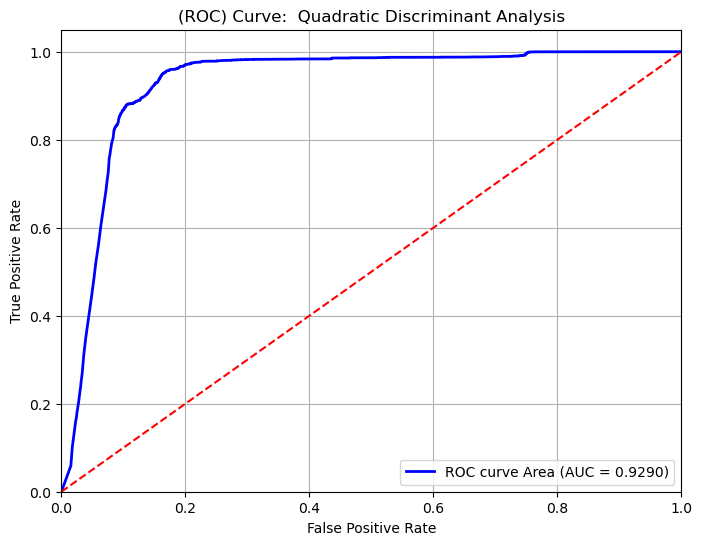

Execution time: 0.669 seconds


In [100]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



start_time = time.time()  # Record the start time

# Train a LinearDiscriminantAnalysis Classifier using the selected features
model7 = QuadraticDiscriminantAnalysis()
model7.fit(X_train_selected1, y_train) 


#Model training and training score
y_train_pred7 = model7.predict(X_train_selected1)
y_train_pred_probs7 = model7.predict_proba(X_train_selected1)[:,1]

train_accuracy7 = accuracy_score(y_train, y_train_pred7)*100
train_auc_roc7 = roc_auc_score(y_train, y_train_pred_probs7)*100

print('Confusion matrix:\n', confusion_matrix(y_train, y_train_pred7))

print('Training AUC: %.4f %%' % train_auc_roc7)

print('Training accuracy: %.4f %%' % train_accuracy7)



#Model testing  and testing  score
y_test_pred7 = model7.predict(X_test_selected1)
y_test_pred_probs7 = model7.predict_proba(X_test_selected1)[:,1]

test_accuracy7 = accuracy_score(y_test, y_test_pred7)*100
test_auc_roc7 = roc_auc_score(y_test, y_test_pred_probs7)*100

print('Confusion matrix(test):\n', confusion_matrix(y_test, y_test_pred7))

print('Testing AUC(test): %.4f %%' % test_auc_roc7)

print('Testing accuracy: %.4f %%' % test_accuracy7)



# Make predictions  
y_test_pred7 = model7.predict(X_test_selected1) 

# Classification report
print(classification_report(y_test, y_test_pred7))   #precison-recall
print('Prediction Accuracy:', round(accuracy_score(y_test, y_test_pred7), 3))

# Detemine probailities of y_pred
y_test_pred_probs7 = model7.predict_proba(X_test_selected1)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs7)
roc_auc7 = roc_auc_score(y_test, y_test_pred_probs7)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve Area (AUC = %0.4f)' % roc_auc7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve:  Quadratic Discriminant Analysis')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

end_time = time.time()  # Record the end time
execution_time = end_time - start_time  # Calculate the execution time
print('Execution time:', round(execution_time, 3), 'seconds')  # Print the execution time rounded to three decimal places



# Model 4: RandomForestClassifier with hyperparameter tuning

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}


scorer = make_scorer(roc_auc_score)  # Use ROC AUC score as the evaluation metric

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring=scorer, cv=10)
grid_search.fit(X_train_selected1, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train_selected1, y_train)

# Training Set Evaluation
y_train_pred = best_model.predict(X_train_selected1)
y_train_pred_probs = best_model.predict_proba(X_train_selected1)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred) * 100
train_auc_roc = roc_auc_score(y_train, y_train_pred_probs) * 100

print('Training Accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)

# Testing Set Evaluation
y_test_pred = best_model.predict(X_test_selected1)
y_test_pred_probs = best_model.predict_proba(X_test_selected1)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred) * 100
test_auc_roc = roc_auc_score(y_test, y_test_pred_probs) * 100

print('Testing Accuracy: %.4f %%' % test_accuracy)
print('Testing AUC: %.4f %%' % test_auc_roc)

# Classification Report
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print('Confusion Matrix (Test):\n', confusion_matrix(y_test, y_test_pred))


fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
roc_auc = roc_auc_score(y_test, y_test_pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: RandomForestClassifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


end_time = time.time()
execution_time = end_time - start_time
print('Execution time:', round(execution_time, 3), 'seconds')


# Model 5:  DecisionTree Classifier with hyper paramerer tuning

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Model Testing Accuracy: 0.9115583259127338
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     22498
           1       0.74      0.86      0.79      5577

    accuracy                           0.91     28075
   macro avg       0.85      0.89      0.87     28075
weighted avg       0.92      0.91      0.91     28075

Confusion matrix:
 [[20798  1700]
 [  783  4794]]
Testing Accuracy: 91.1558 %
Testing AUC: 95.7355 %


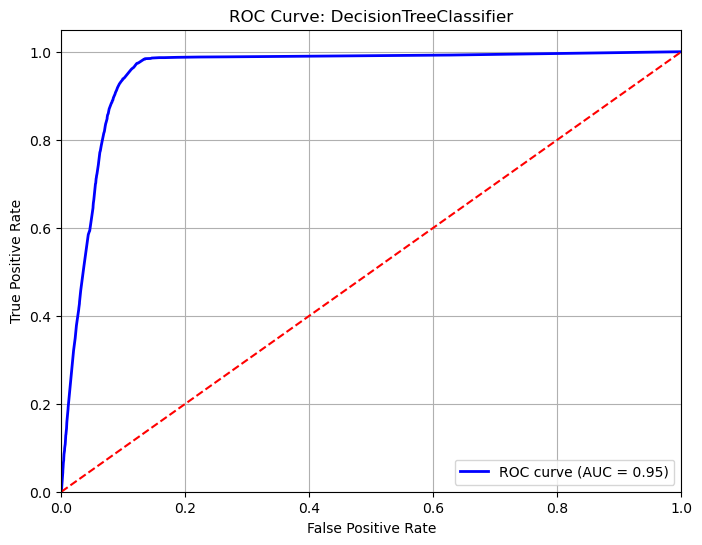

Execution time: 8.426 seconds


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

def tune_decisiontree(X_train_selected1, X_test_selected1, y_train, y_test):
    start_time = time.time()  # Record the start time
    
    # Define the parameter grid to search over
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize the Decision Tree classifier
    model = DecisionTreeClassifier(random_state=0)

    # Initialize GridSearchCV with the classifier, parameter grid, and scoring metric
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

    # Perform the grid search
    grid_search.fit(X_train_selected1, y_train)

    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Use the best model for predictions and evaluation
    y_test_pred = best_model.predict(X_test_selected1)
    accuracy = accuracy_score(y_test, y_test_pred)

    print('Best Parameters:', best_params)
    print('Best Model Testing Accuracy:', accuracy)

    # Print classification report and confusion matrix
    print(classification_report(y_test, y_test_pred))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred))
    
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    test_auc_roc = roc_auc_score(y_test, y_test_pred_probs) * 100

    print('Testing Accuracy: %.4f %%' % test_accuracy)
    print('Testing AUC: %.4f %%' % test_auc_roc)

    # Calculate ROC curve and AUC score
    y_pred_proba = best_model.predict_proba(X_test_selected1)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve: DecisionTreeClassifier')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    end_time = time.time()  # Record the end time
    execution_time = end_time - start_time  # Calculate the execution time
    print('Execution time:', round(execution_time, 3), 'seconds')  # Print the execution time

    return best_model

# Assuming X_train_selected1, X_test_selected1, y_train, y_test are defined elsewhere
best_model = tune_decisiontree(X_train_selected1, X_test_selected1, y_train, y_test)
